In [1]:
import sys
sys.path.append('../src')

XML_PATH = '../data/drugbank_partial.xml'

# Task #1

In [2]:
from transformations import build_drugs_dataframe

df_drugs = build_drugs_dataframe(XML_PATH)
df_drugs.head(10)

,drugbank_id,name,type,description,dosage_form,indication,mechanism_of_action,food_interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,None,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,None,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,None,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,None,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,None,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,
5,DB00006,Bivalirudin,small molecule,Bivalirudin is a synthetic 20 residue peptide ...,None,For treatment of heparin-induced thrombocytope...,Inhibits the action of thrombin by binding bot...,Avoid echinacea.; Avoid herbs and supplements ...
6,DB00007,Leuprolide,small molecule,Leuprolide is a synthetic 9-residue peptide an...,None,Leuprolide is indicated for the treatment of a...,Gonadotropin-releasing hormone (GnRH) is a nat...,
7,DB00008,Peginterferon alfa-2a,biotech,Peginterferon alfa-2a is a form of recombinant...,None,Peginterferon alfa-2a is indicated for the tre...,Peginterferon alfa-2a is derived from recombin...,Drink plenty of fluids.
8,DB00009,Alteplase,biotech,Alteplase is a recombinant tissue plasminogen ...,None,Alteplase is indicated for the treatment of ac...,Alteplase is a recombinant tissue plasminogen ...,Avoid herbs and supplements with anticoagulant...
9,DB00010,Sermorelin,biotech,Sermorelin acetate is the acetate salt of an a...,None,"For the treatment of dwarfism, prevention of H...",Sermorelin binds to the growth hormone releasi...,


# Task #2

In [3]:
from transformations import build_synonyms_dataframe

df_synonyms = build_synonyms_dataframe(XML_PATH)
df_synonyms.head(10)

,drugbank_id,synonym
0,DB00001,"[Leu1, Thr2]-63-desulfohirudin"
1,DB00001,Desulfatohirudin
2,DB00001,Hirudin variant-1
3,DB00001,Lepirudin
4,DB00001,Lepirudin recombinant
5,DB00001,R-hirudin
6,DB00002,Cetuximab
7,DB00002,Cétuximab
8,DB00002,Cetuximabum
9,DB00003,Deoxyribonuclease (human clone 18-1 protein mo...


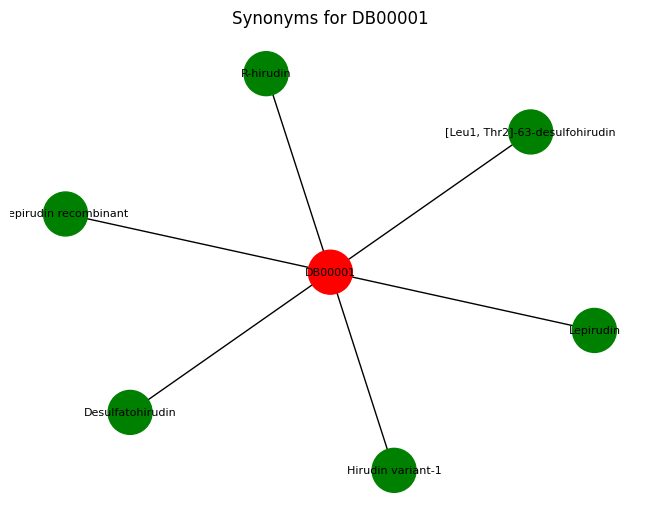

In [4]:
from visualizations import draw_synonym_graph

example_drug_id = df_synonyms["drugbank_id"].unique()[0]

draw_synonym_graph(example_drug_id, df_synonyms)

# Task #3

In [5]:
from transformations import build_products_dataframe

df_products = build_products_dataframe(XML_PATH)
df_products.head(10)

,drugbank_id,product_name,labeller,ndc_product_code,dosage_form,route,strength,country,approved_by
0,DB00001,Refludan,Bayer,[],Powder,Intravenous,50 mg/1mL,US,true
1,DB00001,Refludan,Bayer,[],"Powder, for solution",Intravenous,50 mg / vial,Canada,true
2,DB00001,Refludan,Celgene Europe Limited,[],"Injection, solution, concentrate",Intravenous,50 mg,EU,false
3,DB00001,Refludan,Celgene Europe Limited,[],"Injection, solution, concentrate",Intravenous,50 mg,EU,false
4,DB00001,Refludan,Celgene Europe Limited,[],"Injection, solution, concentrate",Intravenous,20 mg,EU,false
5,DB00001,Refludan,Celgene Europe Limited,[],"Injection, solution, concentrate",Intravenous,20 mg,EU,false
6,DB00002,Erbitux,ImClone LLC,[],Solution,Intravenous,2 mg/1mL,US,true
7,DB00002,Erbitux,ImClone LLC,[],Solution,Intravenous,2 mg/1mL,US,true
8,DB00002,Erbitux,"Imclone, Llc",[],Solution,Intravenous,2 mg / mL,Canada,true
9,DB00002,Erbitux,Merck Europe B.V.,[],"Injection, solution",Intravenous,5 mg/ml,EU,true
